# 911 Calls Capstone Project





## Data and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

**Reading the csv file as a dataframe called df**

In [ ]:
#df = pd.read_csv('/content/drive/My Drive/Capstone Projects/911 calls project/911.csv')
df = pd.read_csv('911.csv')

**Checking the info() of the df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Checking the head of df**

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [ ]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [ ]:
df['title'].nunique()

148

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**


In [ ]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

**Finding the most common Reason for a 911 call based off of this new column?**

In [ ]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

**Now using seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='reason', ylabel='count'>

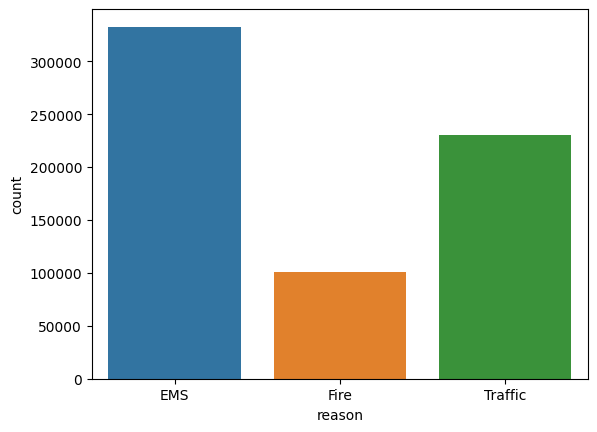

In [ ]:
sns.countplot(x= 'reason', data = df)

**using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [ ]:
#df['timeStamp'].apply(pd.to_datetime(df['timeStamp']))
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
time = df['timeStamp'].iloc[0]
df['hour']=df['timeStamp'].apply( lambda x: x.hour)
df['month']=df['timeStamp'].apply( lambda x: x.month)
df['day']=df['timeStamp'].apply( lambda x: x.dayofweek)
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**We are using the .map() with this dictionary to map the actual string names to the day of the week:**

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
s = df['day']
df['day']=s.map(dmap)
df.head()
#s.map(dmap)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


**usinging seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='day', ylabel='count'>

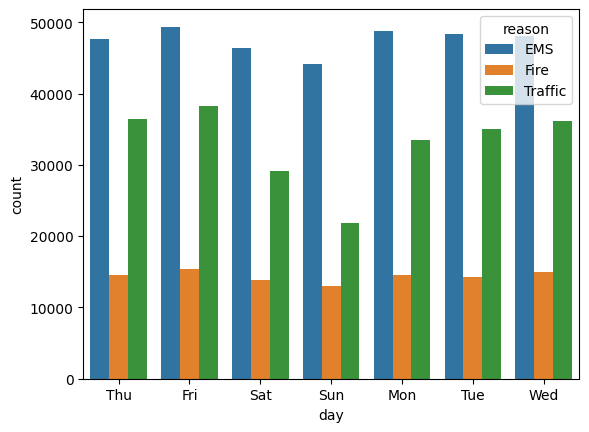

In [ ]:
sns.countplot(x= 'day', data = df, hue='reason')

**Doing the same for Month:**

<Axes: xlabel='month', ylabel='count'>

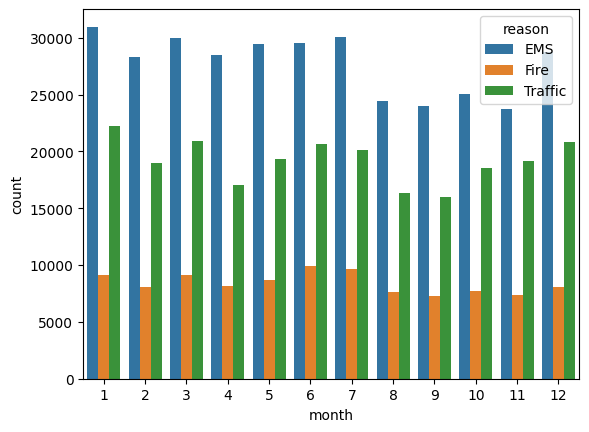

In [ ]:
sns.countplot(x= 'month', data = df, hue='reason')

**Now creating a gropuby object called *month*, where we group the DataFrame by the month column and using the count() method for aggregation.**

<Axes: xlabel='month'>

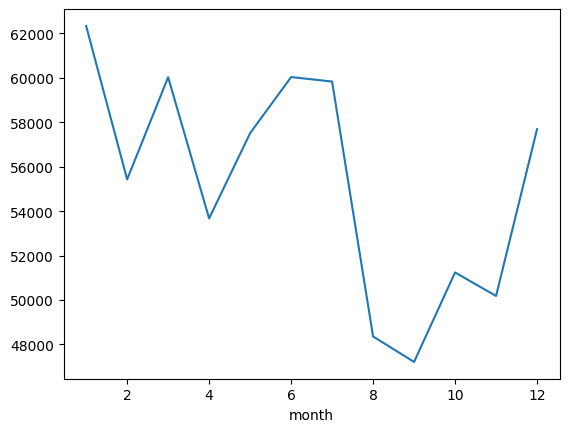

In [ ]:
y=df.groupby('month').count()['lat']
y.plot()

**Now we are using seaborn's lmplot() to creating a linear fit on the number of calls per month.**

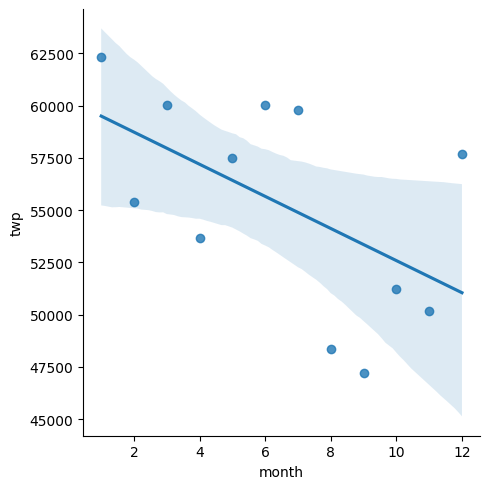

In [ ]:
#df.pivot_table(values='twp', index =['month'])
y=df.groupby('month').count()
sns.lmplot(x='month',y='twp',data=y.reset_index())

**Creating a new column called 'date' that contains the date from the timeStamp column. We are applying the .date() method.**

In [ ]:
df['date']=df['timeStamp'].apply( lambda x: x.date())

**Now we are using groupby on this date column with the count() aggregate and creating a plot of counts of 911 calls.**

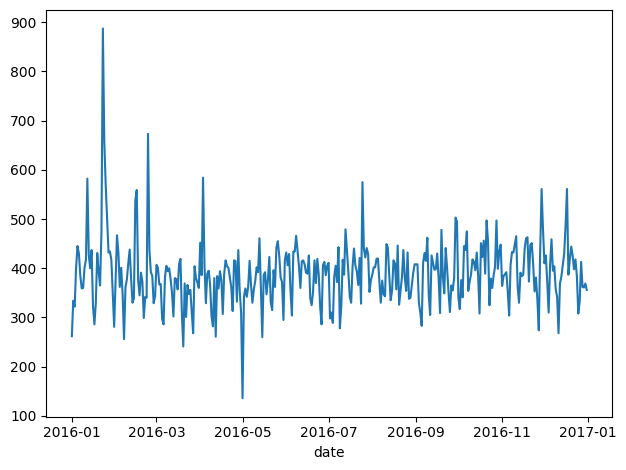

In [ ]:
df['year']=df['timeStamp'].apply( lambda x: x.year)
y = df[df['year']== 2016].groupby('date').count()['lat']
y.plot()
plt.tight_layout()
#df['date'].head()

**Now recreating this plot but creating 3 separate plots with each plot representing a Reason for the 911 call**

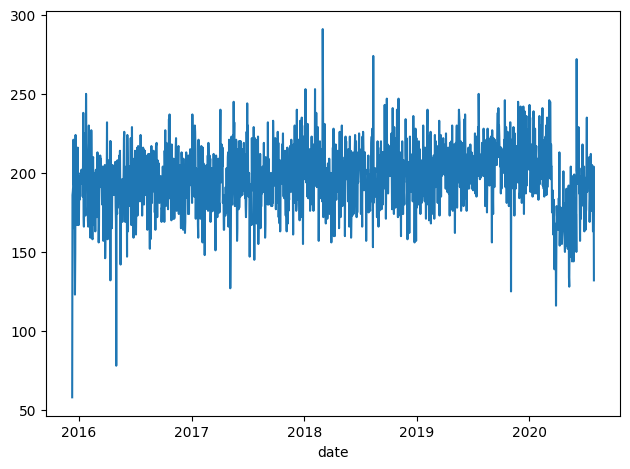

In [ ]:
y = df[df['reason']== 'EMS'].groupby('date').count()['lat']
y.plot()
plt.tight_layout()

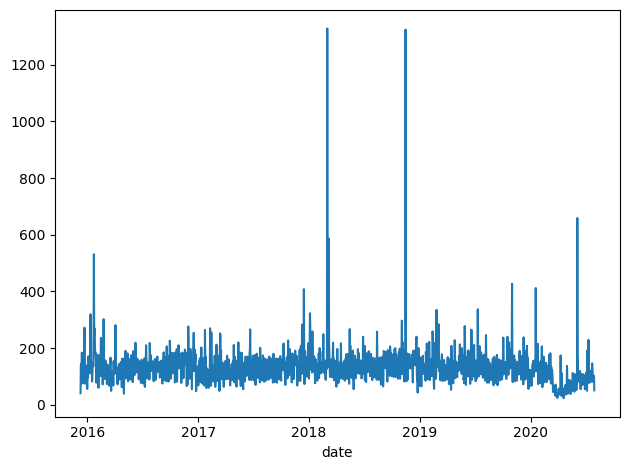

In [ ]:
y = df[df['reason']== 'Traffic'].groupby('date').count()['lat']
y.plot()
plt.tight_layout()

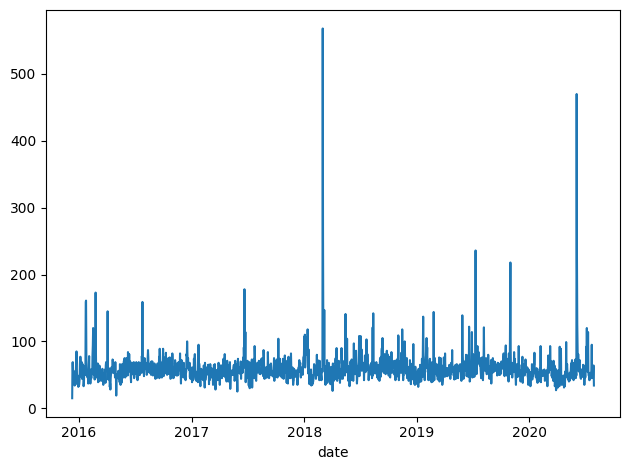

In [ ]:
y = df[df['reason']== 'Fire'].groupby('date').count()['lat']
y.plot()
plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this,like unstack method.**

In [ ]:
z= df.groupby(by=['day','hour']).count()['lat'].unstack()

**Now creating a HeatMap using this new DataFrame.**

<Axes: xlabel='hour', ylabel='day'>

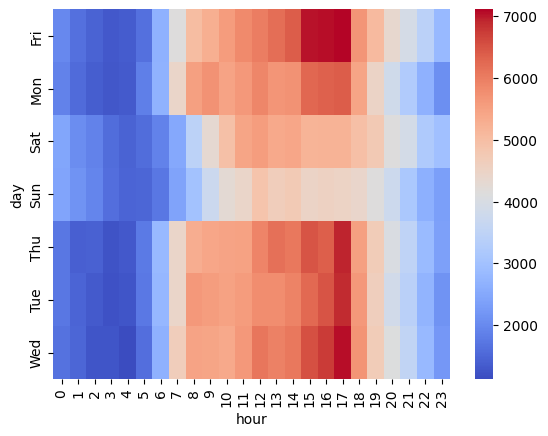

In [ ]:
sns.heatmap(z, cmap='coolwarm')

**Now creating a clustermap using this DataFrame.**

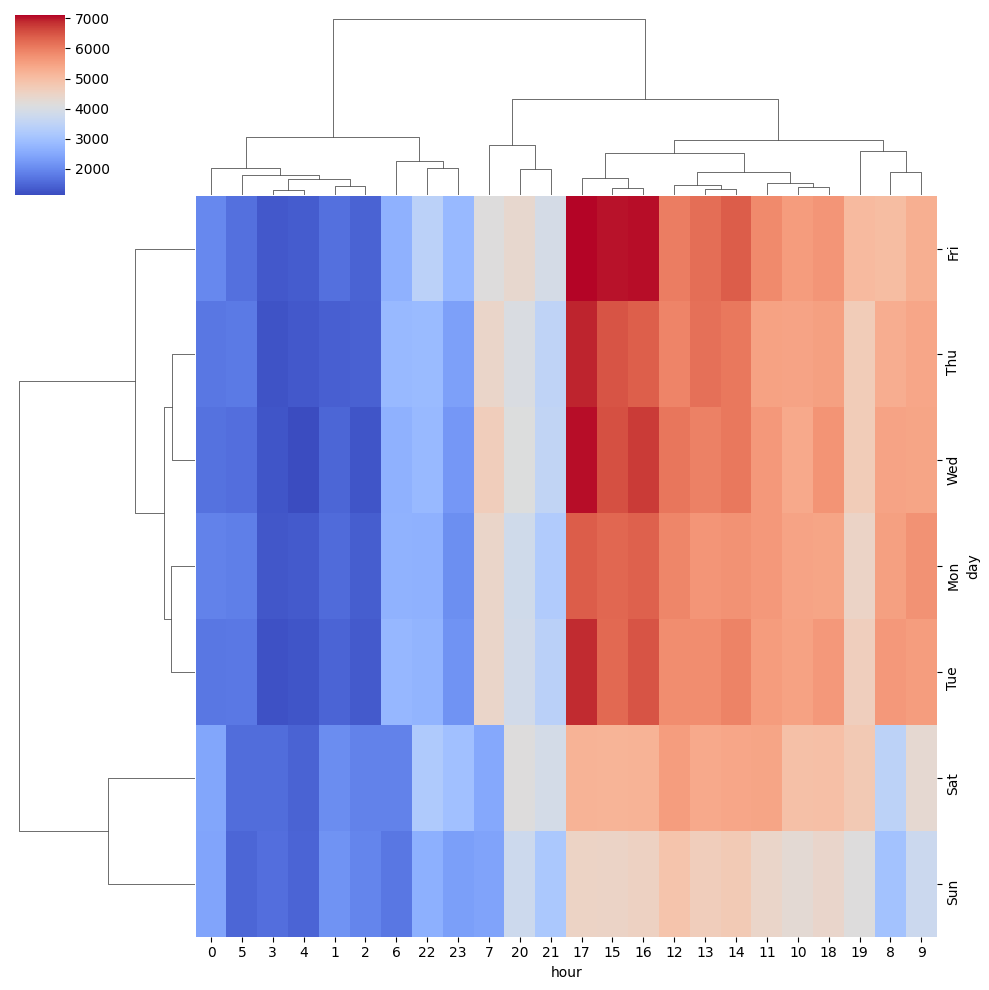

In [ ]:
sns.clustermap(z, cmap='coolwarm')

**Now repeating these same plots and operations, for a DataFrame that shows the Month as the column.**

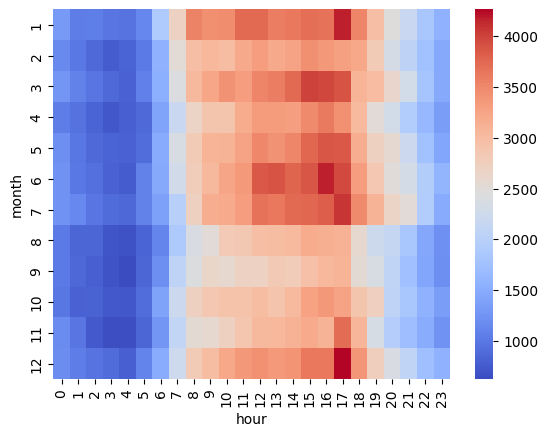

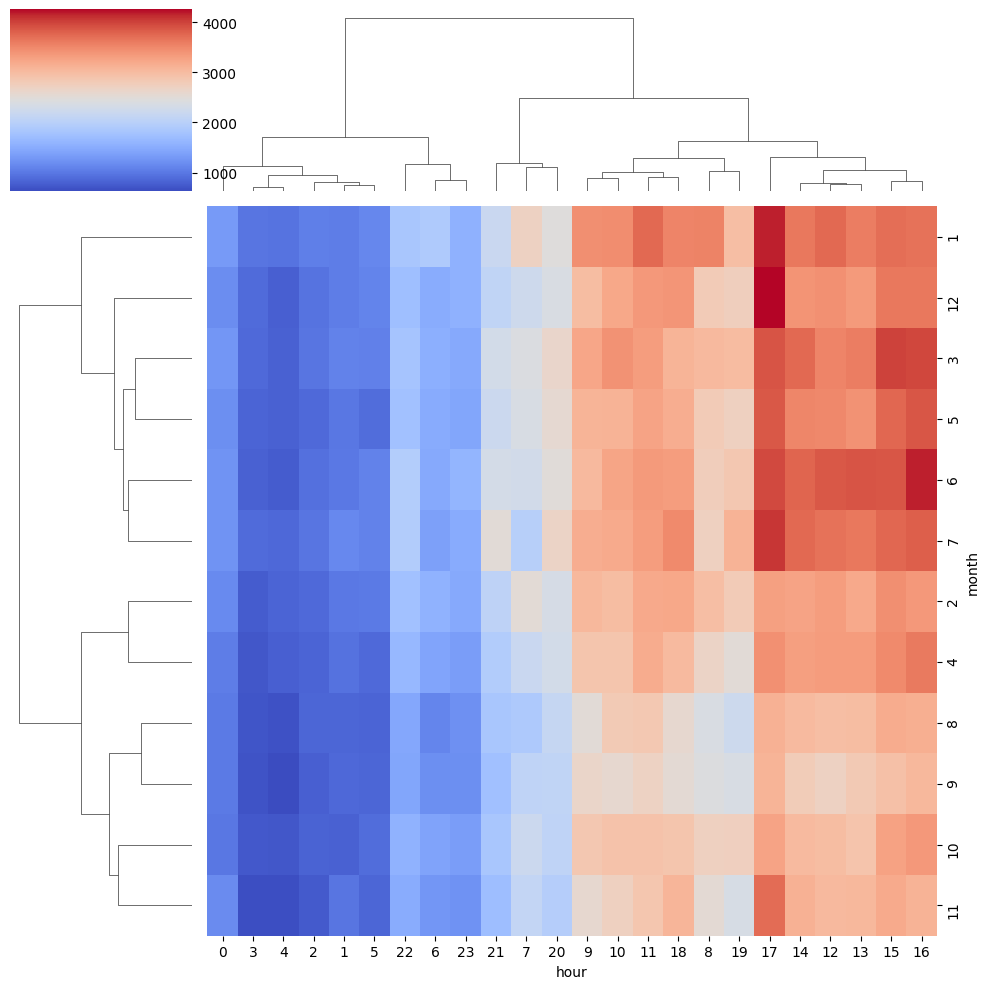

In [ ]:
z= df.groupby(by=['month','hour']).count()['lat'].unstack()
sns.heatmap(z, cmap='coolwarm')
sns.clustermap(z, cmap='coolwarm')
plt.tight_layout()

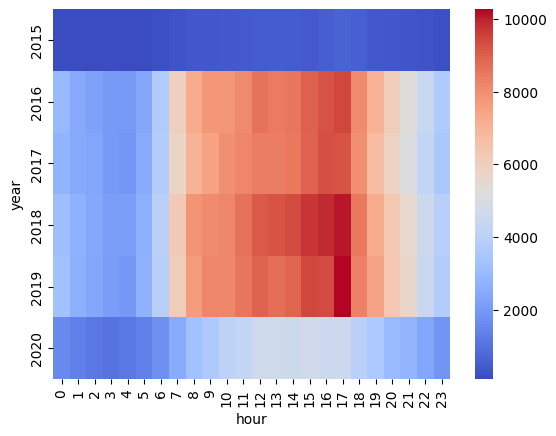

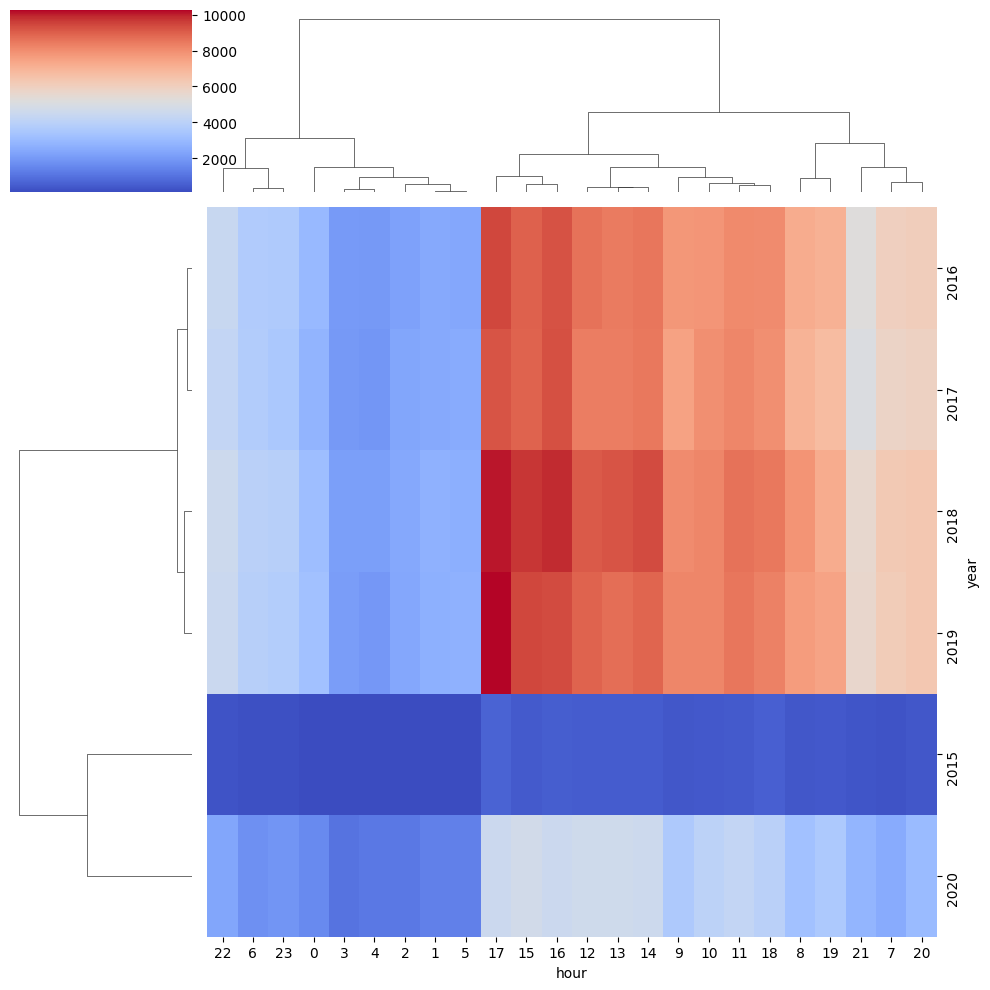

In [ ]:
z= df.groupby(by=['year','hour']).count()['lat'].unstack()
sns.heatmap(z, cmap='coolwarm')
sns.clustermap(z, cmap='coolwarm')
plt.tight_layout()